In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    

In [2]:
import warnings
warnings.filterwarnings("ignore")

!pwd

import socket
hostname = socket.gethostname()
print(hostname)

/home/hyejoo/work/repos/Capstone19/02_music
seung-BM1


In [3]:
import os
import glob
import pickle
import numpy as np
from music21 import converter, instrument, note, chord, stream
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [4]:
sequence_length = 20
sqln = 'sq'+str(sequence_length)

In [5]:
folder_name = 'minyo'

nb_epoch = 100 #
outDir = 'out'
if not os.path.exists(outDir):
    os.makedirs(outDir)

outDirMIDI = 'outMIDI'
if not os.path.exists(outDirMIDI):
    os.makedirs(outDirMIDI)
    
fnmodel = '{}/model_{}_{}.h5'.format(outDir, folder_name, nb_epoch)
#fnmodel = '{}/model_{}.h5'.format(outDir, folder_name)

In [6]:
fnmodel

'out/model_minyo_100.h5'

In [7]:
# !ls -al out/model_*

In [8]:
model = load_model(fnmodel)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 512)           1257472   
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 512)           2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 512)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

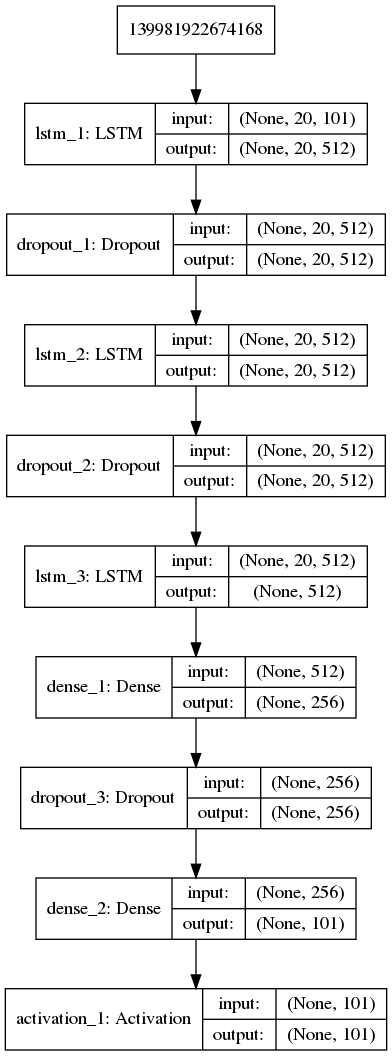

In [10]:
from keras.utils import plot_model
plot_model(model, to_file='{}/{}_model.png'.format(outDir, folder_name), show_shapes=True)
plot_model(model, to_file='{}/{}_model.svg'.format(outDir, folder_name), show_shapes=False)
from IPython.display import Image
Image('{}/{}_model.png'.format(outDir, folder_name))

In [11]:
def GetMusic(str_input):
    out = str_input.replace('[','')
    out = out.replace(']','')
    out = out.split(',')
    return out[0], out[1]

In [12]:
pickle_name1 = 'network_input2.pickle'
network_input2 = pickle.load(open(pickle_name1, "rb" ) )

In [13]:
# pick a random sequence from the input as a starting point for the prediction
#start = numpy.random.randint(0, len(network_input)-1)
start = 0    #start sequence

print('0 --- {} --> {} th sequence'.format(len(network_input2)-1, start))

0 --- 2149 --> 0 th sequence


In [14]:
pattern = network_input2[start]                #network_input[start]

In [15]:
print(pattern[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [16]:
print(np.shape(pattern))

(20, 101)


In [17]:
pickle_name2 = 'nodu2_to_int_'+folder_name+'_'+sqln+'.pickle'
nodu2_to_int = pickle.load( open(pickle_name2, "rb" ) )

In [18]:
#print(nodu2_to_int)

In [19]:
#int_to_nodu2 = {v: k for k, v in nodu2_to_int.items()}

In [20]:
pickle_name_3 = 'nodu2_'+folder_name+'_'+sqln+'.pickle'
nodu2 = pickle.load( open(pickle_name_3, "rb" ) )
nodunames2 = sorted(set(str(item) for item in nodu2))

In [21]:
int_to_nodu2 = dict((number, nodu2) for number, nodu2 in enumerate(nodunames2))

In [22]:
#print(int_to_nodu2)

In [23]:
pred_st= network_input2[0]
print(pred_st.shape)

(20, 101)


In [24]:
#prediction_input = numpy.array(st)
prediction_input = np.reshape(pred_st, (1, pred_st.shape[0], pred_st.shape[1]))
print(prediction_input.shape)

(1, 20, 101)


In [25]:
# generate 500 notes
prediction = model.predict(prediction_input, verbose=1)

1/1 [==============================] - 0s 179ms/step


In [26]:
print(prediction.shape)

(1, 101)


In [27]:
pred_idx = np.argmax(prediction)
print(pred_idx)

28


In [28]:
out = int_to_nodu2[pred_idx]

In [29]:
print(prediction_input, "------------>", out)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] ------------> ['B3', '1.0']


In [30]:
prediction_input.shape

(1, 20, 101)

In [31]:
pitch1, dur1 = GetMusic(out)

In [32]:
print(pitch1, dur1)

'B3'  '1.0'


In [33]:
vpitch=[]
vdur=[]

for i in range(len(pred_st)):
    max_idx = np.argmax(pred_st[i])
    out = int_to_nodu2[max_idx]
    pitch1, dur1 = GetMusic(out)
    vpitch.append(pitch1)
    vdur.append(dur1)
    
#print(vpitch)

prediction_input = np.reshape(pred_st, (1, pred_st.shape[0], pred_st.shape[1]))
print(prediction_input.shape)

for i in range(500):
    prediction = model.predict(prediction_input, verbose=1)
    pred_idx = np.argmax(prediction)
    out2 = int_to_nodu2[pred_idx]
    pitch1, dur1 = GetMusic(out2)
    #print(i, pitch1, dur1)
    vpitch.append(pitch1)
    vdur.append(dur1)
    
    prediction_input = prediction_input[0, 1:, :]
    
    #print(np.shape(prediction_input))
    prediction_input = np.vstack( (prediction_input, prediction))
    
    #print(np.shape(prediction_input))
    prediction_input = np.reshape(prediction_input, (1, pred_st.shape[0], pred_st.shape[1]))
    #print(np.shape(prediction_input))

(1, 20, 101)
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step


In [34]:
vdurf = []
for i in range(len(vpitch)):
    d = vdur[i].replace("'", "")
    vpitch[i] = vpitch[i].replace("'", "")
    df = float(d)
    vdurf.append(df)
    print(vpitch[i], df)

B3 0.5
B-4 5.5
B-4 5.5
A4 1.75
A4 1.75
A4 1.25
A4 2.25
A4 1.75
F4 0.75
F4 0.75
A4 1.75
A4 1.75
A4 1.25
D4 0.5
B3 0.5
B-4 5.5
B-4 5.5
B3 0.5
B3 0.5
B-4 5.5
B3 1.0
A4 1.75
B-4 5.5
A4 1.25
A4 1.75
B3 0.5
B-4 5.5
B3 1.0
B3 0.5
B-4 5.5
B-4 5.5
A4 1.75
A4 1.75
A4 1.25
A4 2.25
A4 1.75
F4 0.75
F4 0.75
A4 1.75
A4 1.25
A4 1.25
A4 1.25
A4 2.25
B3 0.5
B-4 5.5
B-4 5.5
A4 1.75
A4 1.75
A4 1.25
A4 2.25
A4 1.75
F4 0.75
F4 0.75
A4 1.75
A4 1.25
A4 1.25
A4 1.25
A4 2.25
A4 2.25
A4 1.75
B-4 5.5
A4 1.75
F4 0.75
A4 2.25
A4 2.25
F4 1.5
F4 0.75
A4 1.75
C5 2.0
B3 1.0
A4 2.25
A4 1.75
B-4 5.5
A4 1.75
F4 0.75
A4 2.25
A4 2.25
F4 1.5
F4 0.75
A4 1.75
C5 2.0
B3 1.0
A4 2.25
A4 0.75
A4 0.5
C5 2.0
C4 2.25
F4 0.25
G4 2.5
F4 0.75
A4 0.5
C5 2.0
C4 2.25
D4 0.25
A4 1.25
A4 0.75
D4 0.25
A4 1.25
D4 0.25
C4 1.0
G4 0.25
F#4 0.5
G4 1.0
C4 0.25
G4 0.25
E4 3.0
G4 1.0
G4 0.75
C4 1.0
F#4 1.25
G4 1.0
G4 0.75
C4 1.0
F#4 1.25
C4 2.25
C4 0.25
C5 2.0
C4 0.5
D4 0.5
A4 2.25
A4 2.25
A4 2.25
A4 0.5
C5 2.0
C4 2.25
F4 1.5
F4 0.75
F4 2.0
G4 2.5
F4

In [35]:
print(np.shape(vpitch))

(520,)


In [37]:
# #[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
#  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
#  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
#  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
#  0. 0. 0. 0. 0.]

### Creating a MIDI file from the predictions

In [36]:
from music21 import converter, instrument, stream, note, chord

In [37]:
#note.Note('B-', quarterLength=0.25)

In [44]:
offset = 0
output_notes = []
for i in range(len(vpitch)):
    print(offset, vpitch[i], vdurf[i])
    
    new_note = note.Note(vpitch[i], quarterLength=vdurf[i]  ) #note.Note(vpitch[i])
    new_note.offset = offset
     
    new_note.storedInstrument = instrument.Piano()
    
    output_notes.append(new_note)
    #offset += vdurf[i]
    #offset += 0.5

0 B3 0.5
0 B-4 5.5
0 B-4 5.5
0 A4 1.75
0 A4 1.75
0 A4 1.25
0 A4 2.25
0 A4 1.75
0 F4 0.75
0 F4 0.75
0 A4 1.75
0 A4 1.75
0 A4 1.25
0 D4 0.5
0 B3 0.5
0 B-4 5.5
0 B-4 5.5
0 B3 0.5
0 B3 0.5
0 B-4 5.5
0 B3 1.0
0 A4 1.75
0 B-4 5.5
0 A4 1.25
0 A4 1.75
0 B3 0.5
0 B-4 5.5
0 B3 1.0
0 B3 0.5
0 B-4 5.5
0 B-4 5.5
0 A4 1.75
0 A4 1.75
0 A4 1.25
0 A4 2.25
0 A4 1.75
0 F4 0.75
0 F4 0.75
0 A4 1.75
0 A4 1.25
0 A4 1.25
0 A4 1.25
0 A4 2.25
0 B3 0.5
0 B-4 5.5
0 B-4 5.5
0 A4 1.75
0 A4 1.75
0 A4 1.25
0 A4 2.25
0 A4 1.75
0 F4 0.75
0 F4 0.75
0 A4 1.75
0 A4 1.25
0 A4 1.25
0 A4 1.25
0 A4 2.25
0 A4 2.25
0 A4 1.75
0 B-4 5.5
0 A4 1.75
0 F4 0.75
0 A4 2.25
0 A4 2.25
0 F4 1.5
0 F4 0.75
0 A4 1.75
0 C5 2.0
0 B3 1.0
0 A4 2.25
0 A4 1.75
0 B-4 5.5
0 A4 1.75
0 F4 0.75
0 A4 2.25
0 A4 2.25
0 F4 1.5
0 F4 0.75
0 A4 1.75
0 C5 2.0
0 B3 1.0
0 A4 2.25
0 A4 0.75
0 A4 0.5
0 C5 2.0
0 C4 2.25
0 F4 0.25
0 G4 2.5
0 F4 0.75
0 A4 0.5
0 C5 2.0
0 C4 2.25
0 D4 0.25
0 A4 1.25
0 A4 0.75
0 D4 0.25
0 A4 1.25
0 D4 0.25
0 C4 1.0
0 G4 0.25
0 F#4 0.5
0 

In [46]:
fn_out = '{}/{}_generated_stsq{}_{}eeeee3.mid'.format(outDirMIDI, folder_name, start, sqln)
midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp=fn_out)
print(fn_out)

outMIDI/minyo_generated_stsq0_sq20eeeee3.mid
